## This notebook is going to use LogisticRegression to classify digits

We are going to be using different levels of Regularisation and seeing what difference it makes

Some sections will have parts that say #your code here, so guess what you have to do then!

In [1]:
from sklearn.datasets import load_digits

In [2]:
import numpy as np

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
X.shape

(1797, 64)

What does this mean? Put the answer below

This digits dataset contains 1797 images of digits each image is turned into a grid of 8 by 8 pixels. Instead of color, each pixel has a number from 0 to 16 that shows how dark it is. The dataset is like a big list where each item is an image's grid, flattened out into a line of 64 numbers. These numbers help a computer learn to recognize which digit each image shows, from 0 to 9.

$\alpha_2$

I want to plot something, you may need to import stuff

In [8]:
import matplotlib.pyplot as plt


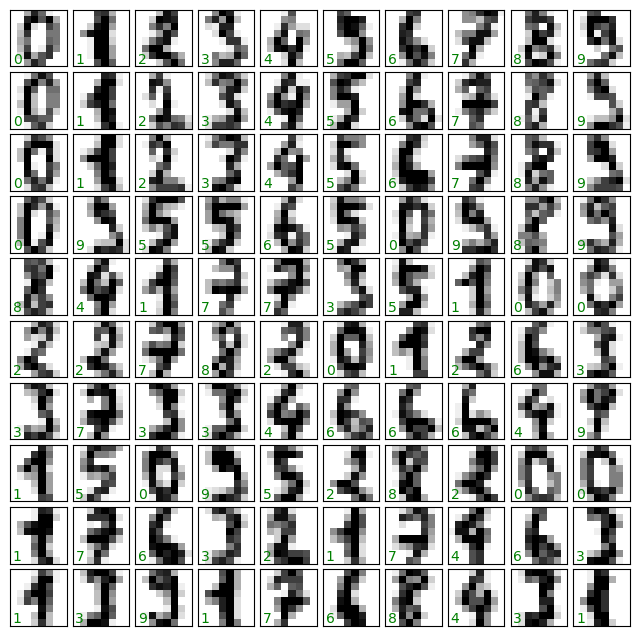

In [9]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

This shows us what we are dealing with, 8x8 images in greyscale

Import the model you'll be using and the splitting thing we use

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Now split the set into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1138)

In [12]:
X_train.shape

(1437, 64)

In [13]:
X_test.shape

(360, 64)

In [14]:
y_train.shape

(1437,)

Now make a model without any regularisation, fit it and print the scores for both training and test data

In [36]:
model_no_reg = LogisticRegression(max_iter=10000)

model_no_reg.fit(X_train, y_train)

print("Intercept:", model_no_reg.intercept_)
print("Coefficients:", model_no_reg.coef_)

training_score = model_no_reg.score(X_train, y_train)
test_score = model_no_reg.score(X_test, y_test)

print(f"Training score: {training_score}")
print(f"Test score: {test_score}")


Intercept: [ 0.00626401 -0.19007875  0.00082282 -0.00917809  0.09174958 -0.00592169
  0.00273487  0.02131225  0.11505961 -0.0327646 ]
Coefficients: [[ 0.00000000e+00  4.05988605e-03 -1.09056574e-02  1.91938042e-01
   6.16865225e-02 -1.09864001e-01 -1.09934605e-01 -1.25715760e-02
  -4.18931644e-05  1.78697008e-02 -8.31772545e-02  1.21555596e-01
   4.26391854e-02  8.35664282e-02 -3.24423790e-02 -1.44373077e-02
  -2.82724304e-03  3.56656936e-02  7.27084847e-02 -3.11086683e-02
  -2.72427954e-01  1.47197483e-01  8.88141076e-02 -4.82145181e-03
  -1.41149908e-03  9.86345927e-02  8.66823431e-02 -8.40487332e-02
  -3.89006507e-01  2.73028086e-02  1.00667295e-01 -1.54407642e-04
   0.00000000e+00  1.27878462e-01  8.21633309e-02 -2.02025337e-01
  -3.76133094e-01  5.59088100e-02  8.70202101e-02  0.00000000e+00
  -3.58156179e-04 -1.54148508e-03  2.11677612e-01 -7.85782851e-02
  -8.59449914e-02  7.79782630e-02  4.79860298e-02 -1.58197513e-04
  -1.22743175e-03 -9.00163495e-02  6.77365593e-02  4.1207810

I got scores of 1.0 for the training set and 0.963888 for the test set, your numbers may vary but this suggests overfitting to me

My lecturer told me, you can help prevent overfitting by using regularisation! So you should do that too

Try it with the default regularisation parameter, change max_iter if needed!

In [16]:
model_with_reg = LogisticRegression(max_iter=10000)

model_with_reg.fit(X_train, y_train)

training_score_reg = model_with_reg.score(X_train, y_train)
test_score_reg = model_with_reg.score(X_test, y_test)

print(f"Training score with regularization: {training_score_reg}")
print(f"Test score with regularization: {test_score_reg}")


Training score with regularization: 1.0
Test score with regularization: 0.9777777777777777


I got scores of 1.0 and 0.975, again your numbers may vary. So better in the test set

But my lecturer also told me, you should not be using the test set to make decisions, let's try again using cross_val_score

First import it

In [17]:
from sklearn.linear_model import LogisticRegression

Now try the one with no regularisation first

In [26]:
from sklearn.model_selection import  cross_val_score


scores_no_reg = cross_val_score(model_no_reg, X_train, y_train)
print("Average CV score without regularization:", np.mean(scores_no_reg))


Average CV score without regularization: 0.9478126209833526


I got a cross val average of 0.9464 again, your numbers may vary. If you want the same numbers as me, go back to your train split and use random_state=1138

Now do a cross valscore with default regularisation

In [27]:
model_with_reg = LogisticRegression(max_iter=10000)
model_with_reg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

I got 0.95894, so I should use the LogisticRegression with some regularisation

Before we try different amounts of regularisation, let's put a StandardScaler in using a pipeline and see if that makes any difference

Import make_pipeline and StandardScaler

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Create a model with the make_pipeline : StandardScaler and then default LogisticRegression (some regularisation)

and get the cross_val_score average

In [31]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

scores_pipeline = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Average CV score with pipeline:", np.mean(scores_pipeline))


Average CV score with pipeline: 0.9645107433217189


I got 0.9645, so slightly better again and it was much faster to calculate - less iterations. 

I should use a standardscaler or let's try one more thing

All the values in our X are between 0 and 16. Let's make those number go between 0 and 1 - to do this just divide by 16

It is very very common to do this with image data

In [32]:
X_train_div = X_train/16

In [33]:
X_test_div = X_test/16

In [34]:
model = LogisticRegression(max_iter=10000)
cross_val_score(model, X_train_div, y_train).mean()

0.9617305458768872

Not as good, oh well, worth a try

# Note

Typically with image data we would just do this step anyway (usually dividing by 255) and not bother with StandardScaler - it usually works better for images

## Cross-validation time on C

Set up a list of potential C values, 0.0001, 0.001 etc. up to 10000 are good ones to try but you can mix in 2s and 5s etc - whatever you want

In [38]:
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 2, 5, 10, 100, 1000, 10000]

Set up an array to store the scores

In [40]:
scores = []

Now loop over each C without a standardscaler firstly, storing each validation average in the array you set up above

(using the original X_train)

In [41]:
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10000)
    score = cross_val_score(model, X_train, y_train).mean()
    scores.append(score)

Use np.argmax to get the index of the best one, print that score and the C that gave it

In [42]:
best_score_index = np.argmax(scores)
best_score = scores[best_score_index]
best_C = C_values[best_score_index]

(best_score, best_C)

(0.96312185443283, 0.01)

0.9624274099883856 score with C=0.1

Now with StandardScaler

In [44]:
scores_with_scaler = []

for C in C_values:
    pipeline = make_pipeline(StandardScaler(), LogisticRegression(C=C, max_iter=10000))
    score = cross_val_score(pipeline, X_train, y_train, cv=5).mean()
    scores_with_scaler.append(score)

In [45]:
best_score_index_scaler = np.argmax(scores_with_scaler)
best_score_scaler = scores_with_scaler[best_score_index_scaler]
best_C_scaler = C_values[best_score_index_scaler]

(best_score_scaler, best_C_scaler)

(0.9645107433217189, 1)

0.9645107433217189 score with C=1

In [46]:
0.9624274099883856 > 0.9645107433217189

False

So my best result (using cross validation), is a LogisticRegression model with C=1 and no StandardScaler. It was very close though

I'm curious, what happens if I do the dividing by 16 thing I suggested earlier, use X_train_div and no StandardScaler

In [47]:
X_train_div = X_train / 16.0
X_test_div = X_test / 16.0


In [51]:
model_scaled = LogisticRegression(C=1, max_iter=10000)

model_scaled.fit(X_train_div, y_train)

scores_scaled = cross_val_score(model_scaled, X_train_div, y_train)
average_score_scaled = scores_scaled.mean()

print(f"Average cross-validation score with manual scaling: {average_score_scaled}")



Average cross-validation score with manual scaling: 0.9617305458768872


I got 0.9645180023228803 score with C=10 using X_train_div. This is the best of the lot, so my previous comment of 


"Typically with image data we would just do this step anyway (usually dividing by 255) and not bother with StandardScaler - it usually works better for images" 


Was correct, I just needed the right regularisation parameter to see it 

Now let's build the final model.

LogisticRegression, C=10, using X_train_div

In [52]:
final_model = LogisticRegression(C=10, max_iter=10000)
final_model.fit(X_train_div, y_train)

LogisticRegression(C=10, max_iter=10000)

Print train and test scores (remember use X_test_div)

In [53]:
training_score = final_model.score(X_train_div, y_train)
print(f"Training score: {training_score}")

test_score = final_model.score(X_test_div, y_test)
print(f"Test score: {test_score}")


Training score: 0.9993041057759221
Test score: 0.975


End Result I got
- 0.9993 training score
- 0.975 test score